# Python Review (Advanced)

Your task is to implement a maze solver. We'll provide you with a 2d array consisting of 3 elements: 0s, 1s, and 3 and 4. The 0s are open spaces where you can move. The 1s represent walls. The 3 is the **start** of the maze. The 4 is the **end** of the maze. Your goal is to navigate through the maze using an algorithm called Breadth First Search (BFS). Write your path using a path of 5s.

This assignment requires the following packages:
```bash
pip3 install matplotlib numpy
```

In [1]:
# helper functions for the maze solver
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def visualize_maze(maze):
    """This takes in a 2d array and visualizes it as a maze. Black represents walls (1s), open paths are white (0s),
    green represents the start (3), and purple represents the end (4). The path is represented by yellow (5s)."""

    colors = [
        "#ffffff",  # 0: white
        "#000000",  # 1: black
        "#00ff00",  # 3: green (start)
        "#800080",  # 4: purple (end)
        "#ffff00",  # 5: yellow (path)
    ]

    value_to_color = {
        0: "#ffffff",
        1: "#000000",
        3: "#00ff00",
        4: "#800080",
        5: "#ffff00"
    }
    # Build the colormap up to the maximum present value
    max_val = int(maze.max())
    color_list = []
    for i in range(max_val + 1):
        color_list.append(value_to_color.get(i, "#ffffff"))

    cmap = ListedColormap(color_list)

    plt.figure(figsize=(5, 5))
    plt.imshow(maze, cmap=cmap)
    plt.xticks([]), plt.yticks([]) # Hide tick marks for nice view
    plt.show()


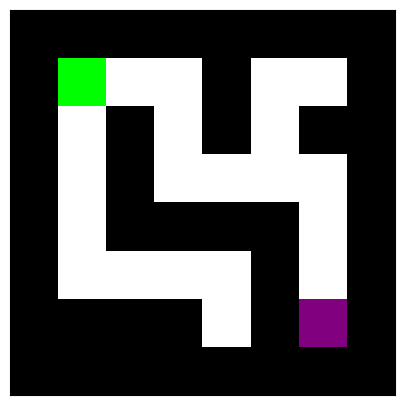

In [2]:
test_maze = np.array([[1, 1, 1, 1, 1, 1, 1, 1],
                      [1, 3, 0, 0, 1, 0, 0, 1],
                      [1, 0, 1, 0, 1, 0, 1, 1],
                      [1, 0, 1, 0, 0, 0, 0, 1],
                      [1, 0, 1, 1, 1, 1, 0, 1],
                      [1, 0, 0, 0, 0, 1, 0, 1],
                      [1, 1, 1, 1, 0, 1, 4, 1],
                      [1, 1, 1, 1, 1, 1, 1, 1]])

visualize_maze(test_maze)

### Breadth First Search (BFS)

Breadth first search (BFS) is a method for searching by expanding out layer by layer in the search tree. You are going to have a start node and a queue. At each step, you want to add all neighbors of your current node to the queue. You can think of a queue as a line, where nodes join at the end and leave from the beginning. You then want to remove the first node from the queue, and then explore its neighbors until you eventually hit your target. 

For this task, store your path thus far and then edit the maze to have 5s where your found path is. Then use visualize maze to see your result!

You can read more on BFS here: https://www.geeksforgeeks.org/dsa/breadth-first-search-or-bfs-for-a-graph/

In [3]:
# YOUR CODE HERE

from collections import deque

def solve_maze(maze):
    start_x = start_y = None
    for x in range(maze.shape[0]):
        for y in range(maze.shape[1]):
            if maze[y, x] == 3:
                start_x, start_y = x, y
                break
    
    # x, y, path_so_far
    queue = deque()
    queue.append((start_x, start_y, []))
    
    visited = set()

    while queue:
        x, y, path = queue.popleft()

        if (x, y) in visited:
            continue

        visited.add((x, y))

        new_path = path + [(x, y)]

        if maze[y, x] == 4:
            for px, py in new_path:
                if maze[py, px] != 3 and maze[py, px] != 4:
                    maze[py, px] = 5
            return maze
        
        neighbors = [
            (x + 1, y),
            (x - 1, y),
            (x, y + 1),
            (x, y - 1)
        ]

        for nx, ny in neighbors:
            if (nx, ny) not in visited and (maze[ny, nx] == 0 or maze[ny, nx] == 4):
                queue.append((nx, ny, new_path))

    return maze

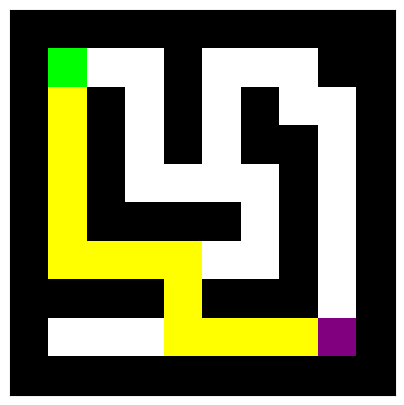

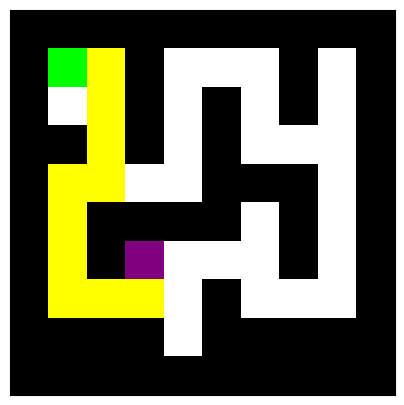

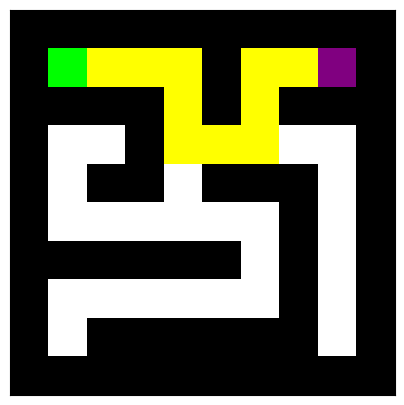

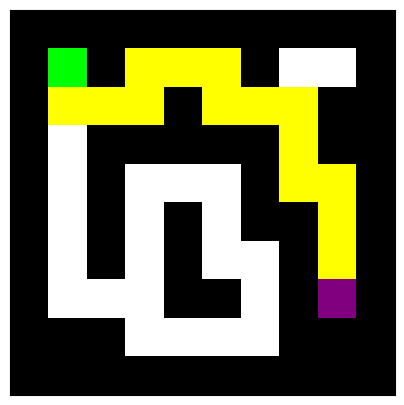

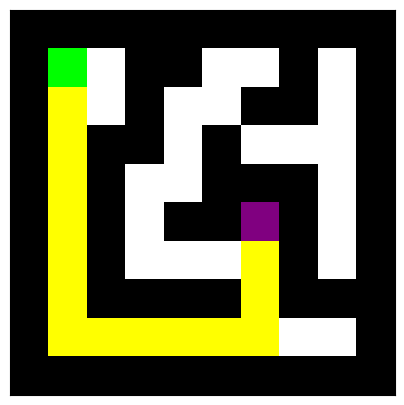

In [4]:
# test mazes

# 5 example 10x10 mazes.
test_mazes = []

test_mazes.append(np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,3,0,0,1,0,0,0,1,1],
    [1,0,1,0,1,0,1,0,0,1],
    [1,0,1,0,1,0,1,1,0,1],
    [1,0,1,0,0,0,0,1,0,1],
    [1,0,1,1,1,1,0,1,0,1],
    [1,0,0,0,0,0,0,1,0,1],
    [1,1,1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,0,0,4,1],
    [1,1,1,1,1,1,1,1,1,1]
]))

test_mazes.append(np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,3,0,1,0,0,0,1,0,1],
    [1,0,0,1,0,1,0,1,0,1],
    [1,1,0,1,0,1,0,0,0,1],
    [1,0,0,0,0,1,1,1,0,1],
    [1,0,1,1,1,1,0,1,0,1],
    [1,0,1,4,0,0,0,1,0,1],
    [1,0,0,0,0,1,0,0,0,1],
    [1,1,1,1,0,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1]
]))

test_mazes.append(np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,3,0,0,0,1,0,0,4,1],
    [1,1,1,1,0,1,0,1,1,1],
    [1,0,0,1,0,0,0,0,0,1],
    [1,0,1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,0,1,0,1],
    [1,1,1,1,1,1,0,1,0,1],
    [1,0,0,0,0,0,0,1,0,1],
    [1,0,1,1,1,1,1,1,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]))

test_mazes.append(np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,3,1,0,0,0,1,0,0,1],
    [1,0,0,0,1,0,0,0,1,1],
    [1,0,1,1,1,1,1,0,1,1],
    [1,0,1,0,0,0,1,0,0,1],
    [1,0,1,0,1,0,1,1,0,1],
    [1,0,1,0,1,0,0,1,0,1],
    [1,0,0,0,1,1,0,1,4,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,1,1,1,1,1,1,1]
]))

test_mazes.append(np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,3,0,1,1,0,0,1,0,1],
    [1,0,0,1,0,0,1,1,0,1],
    [1,0,1,1,0,1,0,0,0,1],
    [1,0,1,0,0,1,1,1,0,1],
    [1,0,1,0,1,1,4,1,0,1],
    [1,0,1,0,0,0,0,1,0,1],
    [1,0,1,1,1,1,0,1,1,1],
    [1,0,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]))


for test_maze in test_mazes:
    visualize_maze(solve_maze(test_maze))
